# 图像转换 (图像增强)

学习如何使用TensorFlow 2.0应用各种图像增强技术。变换是指在训练时对每个图像样本进行变换，每次变换的参数都是随机的。

**变换:**
- 随机翻转
- 随机对比，亮度，饱和度和色调
- 随机失真和裁剪

In [1]:
from __future__ import absolute_import, division, print_function

from IPython.display import Image as IImage, display
import numpy as np
import PIL
from PIL import Image
import random
import requests
import tensorflow as tf

In [2]:
# 获取一张网络图片
d = requests.get("https://www.paristoolkit.com/Images/xeffel_view.jpg.pagespeed.ic.8XcZNqpzSj.jpg")
with open("image.jpeg", "wb") as f:
    f.write(d.content)

In [3]:
# 将图像加载到numpy数组
img = PIL.Image.open('image.jpeg')
img.load()
img_array = np.array(img)

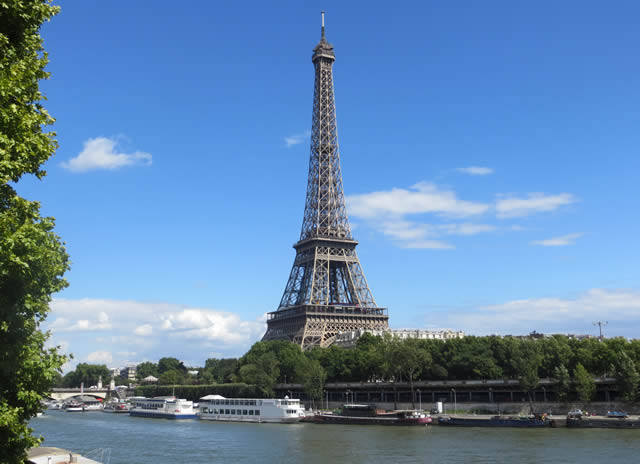

In [4]:
# 显示图片
PIL.Image.fromarray(img_array)

In [5]:
# 随机左右翻转图像
# tf.image.flip_up_down：上下翻转
# tf.image.flip_left_right：左右翻转
# tf.image.transpose_image：对角线翻转
# tf.image.random_flip_up_down：随机上下翻转图片
# tf.image.random_flip_left_right：随机左右翻转图片
def random_flip_left_right(image):
    return tf.image.random_flip_left_right(image)

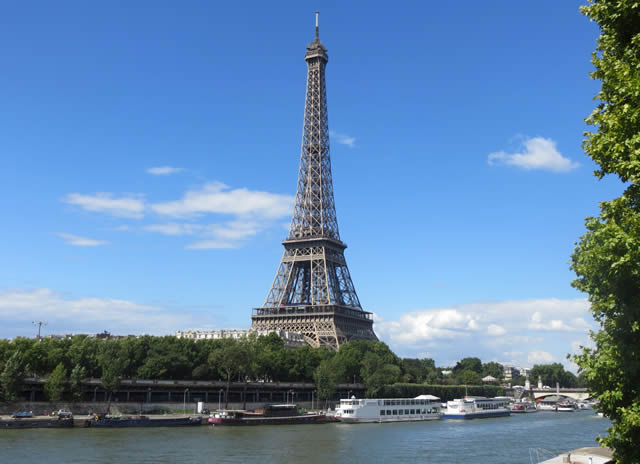

In [6]:
# 展示随机翻转后的图片
PIL.Image.fromarray(random_flip_left_right(img_array).numpy())

In [7]:
# 随机更改图像对比度。
def random_contrast(image, minval=0.6, maxval=1.4):
    # tf.random.uniform()用来生成均匀分布的张量
    # shape：一维整数张量或 Python 数组，输出张量的形状.
    # minval：生成的随机值范围的下限
    # maxval：生成的随机值范围的上限
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_contrast(image, contrast_factor=r)  # contrast_factor对比度因数
    return tf.cast(image, tf.uint8)

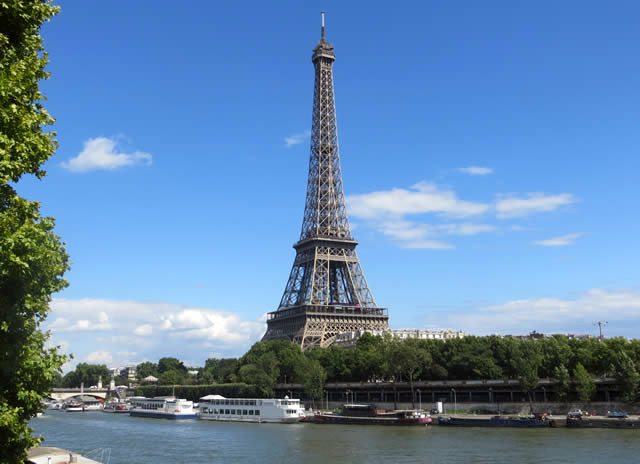

In [8]:
# 展示修改对比度之后的图片
PIL.Image.fromarray(random_contrast(img_array).numpy())

In [9]:
# 随机更改图像亮度
def random_brightness(image, minval=0., maxval=.2):
    r = tf.random.uniform([], minval=minval, maxval=maxval)
    image = tf.image.adjust_brightness(image, delta=r)
    return tf.cast(image, tf.uint8)

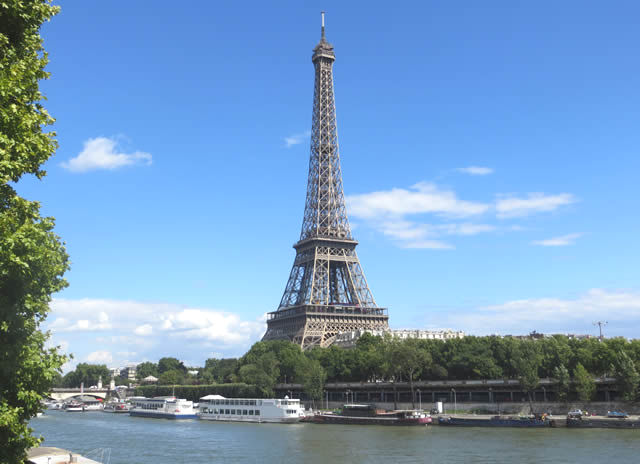

In [10]:
# 展示修改亮度后的图片
PIL.Image.fromarray(random_brightness(img_array).numpy())

In [11]:
# 图像随机更改饱和度
def random_saturation(image, minval=0.4, maxval=2.):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_saturation(image, saturation_factor=r)
    return tf.cast(image, tf.uint8)

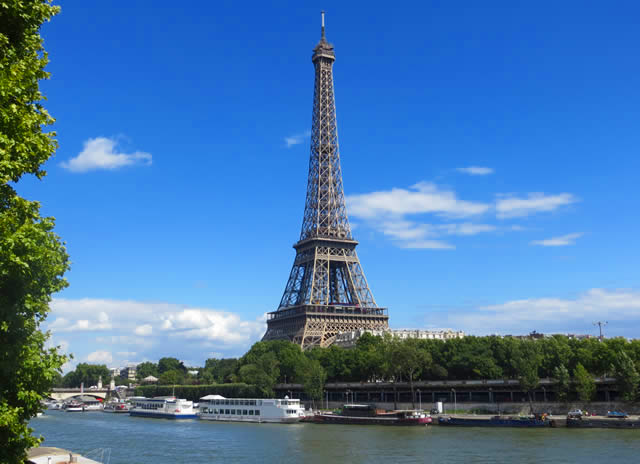

In [12]:
# 展示修改饱和度之后的照片
PIL.Image.fromarray(random_saturation(img_array).numpy())

In [13]:
# 随机更改图像的色调
def random_hue(image, minval=-0.04, maxval=0.08):
    r = tf.random.uniform((), minval=minval, maxval=maxval)
    image = tf.image.adjust_hue(image, delta=r)
    return tf.cast(image, tf.uint8)

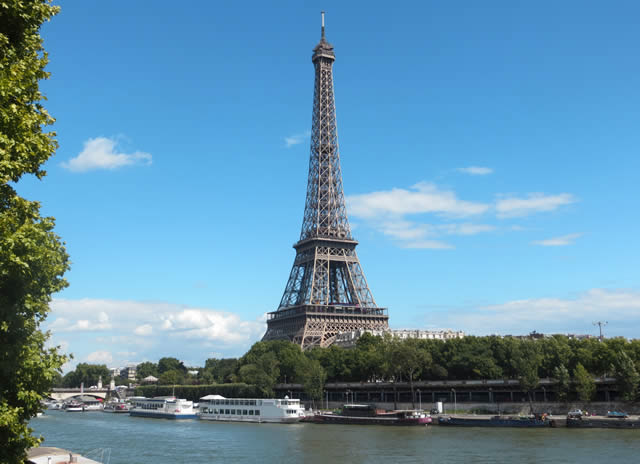

In [14]:
# 展示修改色调之后的图片
PIL.Image.fromarray(random_hue(img_array).numpy())

In [15]:
# 通过以不同的宽高比裁切图像来扭曲图像
def distorted_random_crop(image,
                min_object_covered=0.1,
                aspect_ratio_range=(3./4., 4./3.),
                area_range=(0.06, 1.0),
                max_attempts=100,
                scope=None):

    cropbox = tf.constant([0.0, 0.0, 1.0, 1.0], dtype=tf.float32, shape=[1, 1, 4])
    sample_distorted_bounding_box = tf.image.sample_distorted_bounding_box(
        tf.shape(image),
        bounding_boxes=cropbox,
        min_object_covered=min_object_covered,
        aspect_ratio_range=aspect_ratio_range,
        area_range=area_range,
        max_attempts=max_attempts,
        use_image_if_no_bounding_boxes=True)
    bbox_begin, bbox_size, distort_bbox = sample_distorted_bounding_box

    # 将图像裁剪到指定的边框
    cropped_image = tf.slice(image, bbox_begin, bbox_size)
    return cropped_image

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


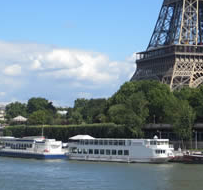

In [16]:
# Display cropped image.
PIL.Image.fromarray(distorted_random_crop(img_array).numpy())

In [17]:
# 这是用于图像数据集（例如ImageNet）的常见图像增强技术
def transform_image(image):
    image = distorted_random_crop(image)
    image = random_flip_left_right(image)
    image = random_contrast(image)
    image = random_brightness(image)
    image = random_hue(image)
    image = random_saturation(image)
    return image

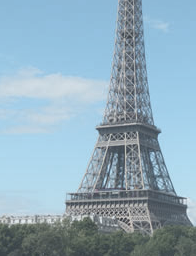

In [18]:
# 显示预处理后的图像
transformed_img = transform_image(img_array).numpy()
PIL.Image.fromarray(transformed_img)

In [19]:
# 将转换后的图像调整为256x256像素的正方形图像，准备进行训练
def resize_image(image):
    image = tf.image.resize(image, size=(256, 256), preserve_aspect_ratio=False)
    image = tf.cast(image, tf.uint8)
    return image

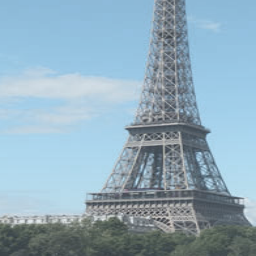

In [20]:
PIL.Image.fromarray(resize_image(transformed_img).numpy())